# Computation for Dynamic Programming, Class 2

In class 1, we learned to do basic value function iteration (VFI) with even grid discretisation in economies with a discrete stochastic state. The aims of class 2 are simple:

1. Learn how to deploy recursive tools to tackle continuous stochastic state processes
2. Learn how to compute full recursive competitive equilibria, both by invoking the Welfare Theorems and through other means

Though the primary goal of this series is to learn to actually *do* the computation, a secondary goal is to solve meaningful models and illuminate the economic mechanisms at play. This class will consider a host of serious macro models; serious in their own right and in the history of the discipline. 

## Example 4: Lucas Asset Pricing Tree

The ideas introduced in lucas' asset pricing tree (*Asset Prices in an Exchange Economy*, 1978)
are both exhilarating and the perfect pedagogical next step. Lucas' tree will allow us to tackle continuous stochastic states. In addition, it will open a low-cost way to think rigorously about equilibrium asset prices.

The model is simple. Imagine there is one unit of an asset pricing "tree" which yields $z_t$ units of dividends (fruits) at time $t\in\{0,1,...\}$. $z_t >0$ is continuous and stochastic. There is a unit mass of consumers who trade shares of the tree. That is, the $i$ th individual brings $v_{i,t}$ units of shares into period $t$. The agent then chooses how many shares to hold, $v_{i,t+1}$, in that period to take to the following. Consumers have utility function $u(c)$ with the same properties as assumed in Class 1. The good consumed is the same good as that produced by the tree. Unlike the social planner, who can simply ignore prices, consumers take prices as given $p(z)$. It is a function of dividends as these fruits perfectly define the state of the aggregate economy. 

[Insert from SLP conditions needed for the value function to differentiable and envelope theorems to apply.]

In Bellman form, 

$$
V(v_i, z) = \max_{v_i'\in [0, (p(z)+z)v_i]} \bigg\{ u([p(z)+z]v_i - p(z)v_i')+\beta \mathbb{E}[V(v_i',z')|z]\bigg\} 
$$

To find the equilibrium condition of the problem, we can differentiate with respect to $v_i$ and $v_i'$ evaluated at the optimum (where $v_{i}'(z)$ is the policy function). Remembering the derivative with respect to the policy variable is zero evaluated at the optimum,

$$
\frac{dV(v_i,z)}{d v_i'} = - p(z) u_c(c) + \beta \mathbb{E}\bigg[\frac{dV(v_i',z')}{d v_i'}|z\bigg] = 0
$$

Rearranged, 

$$
p(z) u_c(c) = \beta \mathbb{E}\bigg[\frac{dV(v_i',z')}{d v_i'}|z\bigg]
$$

Now, differentiating with respect to the current state, 

$$
\frac{dV(v_i,z)}{d v_i} = (p(z)+z)u_c(c)
$$

Inserting this into the first expression but iterated forward a period, 

$$
p(z) u_c(c) = \beta \mathbb{E}\bigg[(p(z')+z')u_c(c')|z\bigg]
$$

From here we can recover the famous, and beautiful, equilibrium pricing condition,

$$
p(z)=  \mathbb{E}\bigg[\underbrace{\frac{\beta u_c(c')}{u_c(c)}}_{m_{t,t+1}} (p(z')+z')|z\bigg]
$$

$m_{t,t+1}$ is the much talked-about stochastic discount factor (SDF) which, really, is what makes asset pricing interesting. In the model, individuals adjust their plans to buy/sell shares to equate prices to make this equation hold. If we knew everything but $p(z)$, then this would simly be a functional equation on which we might apply recursive methods to approximate $p(z)$...

Luckily, under one further assumption we can learn about equilibrium prices in a low cost way. Suppose that everyone inherits the same number of shares in period 0: $v_{i,-1} = v_{-1}, \forall i \in [0,1]$. Realise that, in this case, $v_{i,0} = v_{0}, \forall i \in [0,1]$. This will also be true in every period! Since share purchases are identical across the economy, $c_{i,t} = c_{t}, \forall i \in [0,1]$. Consumption is constant across individuals. This will help us stay in the "representative agent" world. By definition (we will define many other RCEs more formally in this and future classes), markets clear in an RCE. The only is resource is $z_t$. Hence, market clearing implies that $c_t = z_t$ in every period. This is great news. Under equal inheritence, 

$$
p(z)=  \underbrace{\int_{z'}\frac{\beta u_c(z')}{u_c(z)}(p(z')+z')dF(z'|z)}_{T(p)}
$$

Now we will consider the dynamics of $z$. Suppose $\ln z' = \rho \ln z + \sigma \epsilon'$. Here, $\rho \in (0,1), \, \sigma > 0$ and $\epsilon'$ is drawn identically and independently from $N(0,1)$, which has a PDF $\phi$. This will help us because $z' = g(z, \epsilon') = z^\rho e^{\sigma \epsilon'}$.


As Lucas did, if we define helper functions $f(z):=p(z)u_c(z)$ and $h(z) := \beta \int_{\epsilon'} u_c(g(z,\epsilon'))g(z,\epsilon') \phi(\epsilon') d \epsilon'$, we can rewrite the pricing condition as:

$$
f(z) = \underbrace{h(z) + \int_{\epsilon'} f(g(z,\epsilon')) \phi(\epsilon') d\epsilon'}_{T(f)}
$$

Is this a contraction mapping? Rewriting the pricing condition like this makes it easier to show that this is a contraction. This [QuantEcon](https://python-advanced.quantecon.org/lucas_model.html) lesson includes the quick derivation showing it is. Now the question becomes, how can we do the iteration computationally?

Enter Tauchen discretisation. The idea is simple, and similar in spirit to the VFI we have already done. Approximate the continuous process using a discrete Markov chain. 

Split the grid into $N$ evenly spaced points, $z_i \in [z_0, ..., z_{N-1}], z_0 < z_1 < ... < z_{N-1}$. The pricing condition becomes:

$$
p(z_i)=  \sum_{j=0}^{N-1} {\frac{\beta u_c(z_j)}{u_c(z_i)}}(p(z_j)+z_j)P_{ij}, \, \forall z_i
$$

This looks similar to the discrete stochastic state in Class 1! To make further progress, we need decide on two things: 

1. How to pick the bounds of the dividend grid, $z_0$ and $z_{N-1}$?
2. How to build the probability matrix $\mathbf{P}$?


We want to approximated the dynamics of $z$. We know that, 

$$\ln d \sim N \bigg(0, \frac{\sigma^2}{1-\rho}\bigg)$$

If $l_i:=\ln z_i$, We pick bounds $l_0, l_{N-1}$ by choosing a multiple $m>0$ such that $l_0,l_{N-1} = -3m\frac{\sigma}{\sqrt{1-\rho^2}}, 3m\frac{\sigma}{\sqrt{1-\rho^2}}$. A standard choice is $m=3$, which captures 99.7% of observations.

So far so good. Building $\mathbf{P}$ is a bit trickier. We want $F(z'|z)$, the conditional CDF of $d'$. Remembering that $z' = z^\rho e^{\sigma \epsilon'}$, it is clear that:

$$\text{Pr}(z'< c|z) = \text{Pr}(\ln z' < \ln c|z) = \Phi\bigg(\frac{\ln c - \rho \ln z}{\sigma}\bigg)$$

So, $F(z'|z) = \Phi\bigg(\frac{\ln z' - \rho \ln z}{\sigma}\bigg)$. Since the points are evenly spaced, call half of the distance $\delta$. That is, $|z_i - z_j| = 2 \delta, \, j \in \{i-1, i+1\}$. Follow the following two-step procedure. First, for every entry in the matrix, compute:

$$ \tilde P_{ij} =  F(z_j+\delta|z_i) - F(z_j+\delta|z_i), \, j \in \{0,...,N-1\} $$

Since we have not spanned the whole number line, we need to scale up our probabilities so that the sum of each row is one. Compute the $\alpha$ such that, 

$$\sum_{j=0}^{N-1} (\tilde P_{ij} + \alpha_i) = 1 $$

Finally, define the matrix as:

$$P_{ij} = \tilde P_{ij}+\alpha_i$$

The second step helps us preserve the shape of the distribution as opposed to making the end bins abnormally large.

For a given utility function, we are ready to compute equilibrium prices! Once we have equilibrium prices, we can simulate returns for a given dividend path. This relates to an important issue in asset pricing, the *equity premium puzzle*, which we will discuss in the context of the results.

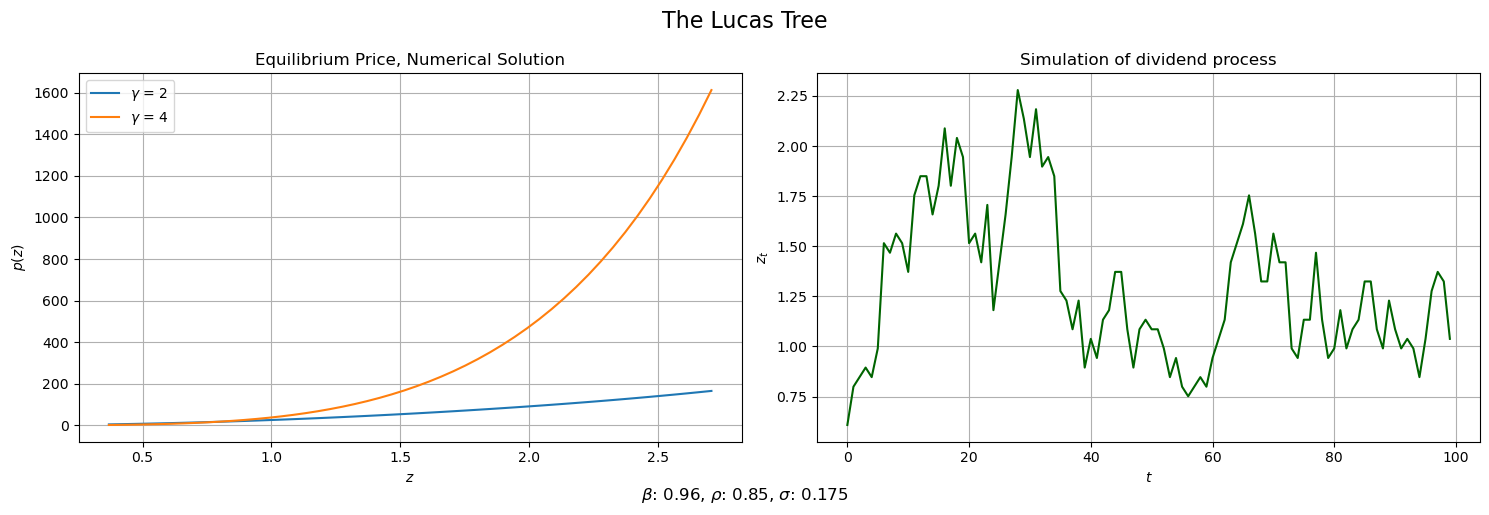

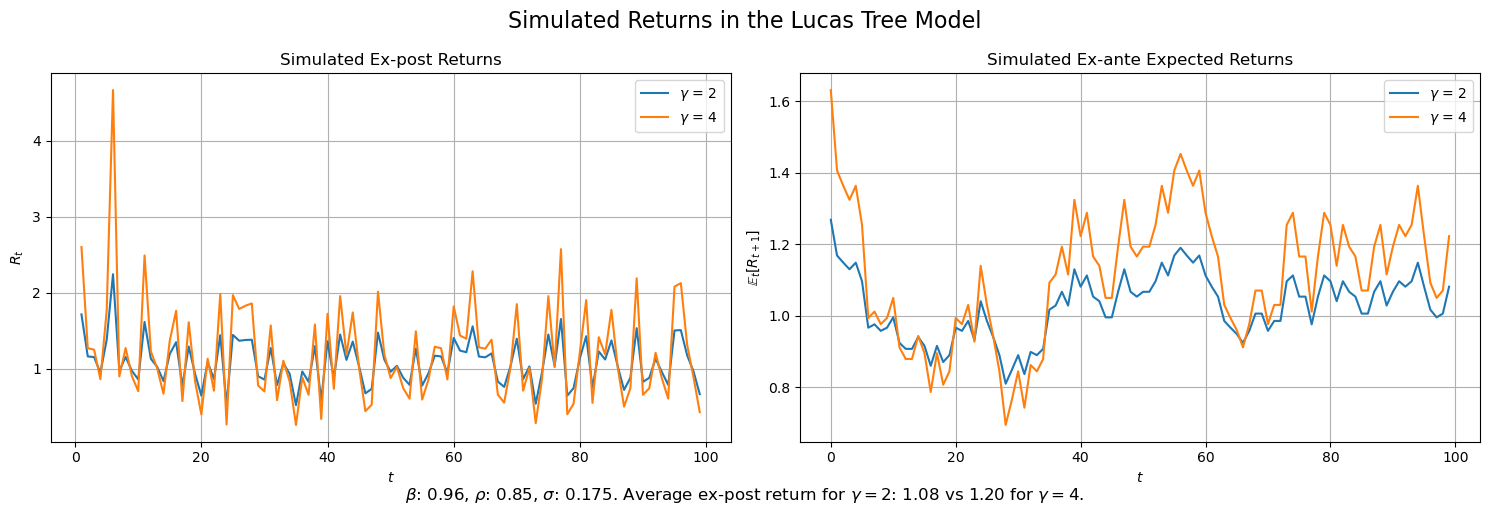

In [1]:
# load base libraries for the class
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

# define a function which creates the z grid and transition matrix, P
def AR_1_tauchen(rho, sigma, N = 10, m = 3):
    """
    Takes an AR(1) process: ln z' = rho * ln z + sigma * epsilon 

    Returns:
    - z_vals: grid for z
    - P: transition matrix which approximate the process
    """
    # import proper libraries
    from scipy.stats import norm
    # upper bound for ln z
    l_upper = m*sigma/np.sqrt(1-rho**2)
    # lower bound for ln z
    l_lower = - l_upper
    # create z grid
    z_grid = np.linspace(np.exp(l_lower), np.exp(l_upper), N)
    # delta 
    delta = (z_grid[1] - z_grid[0])/2
    # l grid
    l_grid = np.log(z_grid)
    # set up the grid for P tilde
    P_tilde = np.zeros((N,N))
    # fill in P tilde
    for i in range(N):
        for j in range(N):
            # normalised upper bound
            norm_upper = (np.log(z_grid[j]+delta)-rho*l_grid[i])/sigma
            # normalised lower bound (or zero)
            norm_lower = (np.log(max(1e-6, z_grid[j]-delta))-rho*l_grid[i])/sigma
            # calculate the prob of going to that bin
            P_tilde[i,j] = norm.cdf(norm_upper)-norm.cdf(norm_lower)
    # for every row compute the alpha and transform
    alphas = (1/N)*(1-np.sum(P_tilde, axis=1))
    # the final P
    P = P_tilde + alphas[:,np.newaxis]
    # return objects of interest
    return P, z_grid

 # define an njit friendly to do VFI
@njit
def VFI_Lucas(beta, gamma, grid_size, z_grid, P, p_initial, threshold):
    """
    Does value function iteration on the pricing condition in the Lucas tree with AR(1) log dividends.
    
    Returns:
    - p_final: approximated final price function
    - iterations: how many iterations it took to get p_final
    """
    
    # compute the marginal utilities
    marginal_utilities = z_grid**(-gamma)
    # set old to initial
    p_old = p_initial.copy()
    # iterations are 0
    iterations = 0 
    # initialise error
    error = 1 + threshold

    # do the iteration
    while error > threshold: 
        # to catch the new price function
        p_new = np.zeros(grid_size)
        # loop over current states z
        for i in range(grid_size):
            # loop over tomorrow z'
            for j in range(grid_size):
                # add states contribution to p(z_i)
                p_new[i] += ((beta*marginal_utilities[j])/marginal_utilities[i])*(p_old[j]+z_grid[j])*P[i,j]
        # calculate the error
        error = np.max(np.abs(p_new - p_old))
        # move the iteration cound
        iterations += 1
        # update p_old
        p_old = p_new.copy()

    # return objects of interest
    return p_new, iterations



# set up the class
class LucasAssetTree:
    # initialise 
    def __init__(self, grid_size, gamma , beta = 0.96, rho = 0.85, sigma = 0.175, m = 3, threshold = 1e-6):
        
        # set parameters
        self.N = grid_size
        self.gamma = gamma
        self.beta = beta
        self.rho = rho
        self.sigma = sigma
        self.m = m
        self.threshold = threshold

        # guess the risk-neutral, unconditional price
        self.p_initial = np.repeat( np.exp(sigma**2/(2*(1-rho**2)))/(1-beta), grid_size)

        # catch parameters
        self.P = None
        self.z_grid = None
        self.p_final = None
        self.iterations = None
        self.sim_states = None
        self.sim_z = None
        self.sim_p = None
        self.sim_ex_post_r = None
        self.sim_ex_ante_r = None

    # solve the it
    def solve(self):
        # create the P matrix and z grid
        self.P, self.z_grid = AR_1_tauchen(self.rho, self.sigma, self.N, self.m)
        # do the VFI
        self.p_final, self.iterations = VFI_Lucas(self.beta, self.gamma, self.N, self.z_grid, self.P, self.p_initial, self.threshold)

    # simulate the process
    def simulate_Lucas(self, T = 100, seed = None):
        # make sure that .solve() has been run
        if self.P is None:
            raise ValueError('Run .solve() first.')
        # if seed make sure it is assigned
        if seed is not None:
            np.random.seed(seed)

        # choose a random place to start 
        current_state = np.random.choice(self.N)
        # catch states
        sim_states = np.zeros(T, dtype = int)
        # catch dividends
        sim_z = np.zeros(T)
        # catch prices
        sim_p = np.zeros(T)

        # do the loop
        for t in range(T):
            # track the states
            sim_states[t] = current_state
            # track the dividends
            sim_z[t] = self.z_grid[current_state]
            # track the prices
            sim_p[t] = self.p_final[current_state]
            # pick next state accoring to P
            current_state = np.random.choice(self.N, p = self.P[current_state])

        # assign to attribute
        self.sim_states = sim_states
        self.sim_z = sim_z
        self.sim_p = sim_p

    # calculate the path of ex-post returns
    def ex_post_returns(self):
        # make sure simulation has been run
        if self.sim_states is None:
            ValueError('Run .simulate_Lucas() first.')
        # create numerator/denominator of ex post returns and make same size
        numerator = self.sim_p[1:]+self.sim_z[1:]
        denominator = self.sim_p[:-1]
        # get ex-post returns
        ex_post_returns = numerator/denominator
        # align lengths
        ex_post_returns = np.concatenate(([np.nan],ex_post_returns))
        # assign
        self.sim_ex_post_r = ex_post_returns

    # calculate the path of ex-ante returns
    def ex_ante_returns(self):
        # make sure simulation has been run
        if self.sim_states is None:
            ValueError('Run .simulate_Lucas() first.')
        # compute a vector of possible future cashflows
        future_cashflow = self.p_final + self.z_grid
        # compute ex ante expected returns per state
        ex_ante_returns = (self.P @ future_cashflow)/self.p_final
        # track the evolution of ex ante returns
        self.sim_ex_ante_r = ex_ante_returns[self.sim_states]

# pick on size of grid for plot
plot_grid_size = 50 
plot_simulation_length = 100
lucas_seed = 78

# An example with gamma = 2
lucas_ex1 = LucasAssetTree(plot_grid_size, 2)
lucas_ex1.solve()
lucas_ex1.simulate_Lucas(T=plot_simulation_length,seed = lucas_seed)
lucas_ex1.ex_post_returns()
lucas_ex1.ex_ante_returns()
av_1_post = np.nanmean(lucas_ex1.sim_ex_post_r)

# An example with gamma = 4
lucas_ex2 = LucasAssetTree(plot_grid_size, 4)
lucas_ex2.solve()
lucas_ex2.simulate_Lucas(T=plot_simulation_length, seed = lucas_seed)
lucas_ex2.ex_post_returns()
lucas_ex2.ex_ante_returns()
av_2_post = np.nanmean(lucas_ex2.sim_ex_post_r)


# initialise the figure of 2 plots
fig_1, axs_1 = plt.subplots(1, 2, figsize=(15, 5))
# plot the price function
axs_1[0].set_title('Equilibrium Price, Numerical Solution')
axs_1[0].plot(lucas_ex1.z_grid, lucas_ex1.p_final, label = fr'$\gamma$ = {lucas_ex1.gamma}')
axs_1[0].plot(lucas_ex2.z_grid, lucas_ex2.p_final, label = fr'$\gamma$ = {lucas_ex2.gamma}')
axs_1[0].set_xlabel(r"$z$")
axs_1[0].set_ylabel(r"$p(z)$")
axs_1[0].legend()
axs_1[0].grid()
# plot dividend process
axs_1[1].set_title('Simulation of dividend process')
axs_1[1].plot(range(plot_simulation_length), lucas_ex1.sim_z, color='darkgreen')
axs_1[1].set_xlabel(r"$t$")
axs_1[1].set_ylabel(r"$z_t$")
axs_1[1].grid()

# set title
fig_1.suptitle(f'The Lucas Tree', fontsize=16)
# subtitle
fig_1.text(0.5, 0, rf'$\beta$: {lucas_ex1.beta}, $\rho$: {lucas_ex1.rho}, $\sigma$: {lucas_ex1.sigma}', ha='center', fontsize=12)
plt.tight_layout()
plt.show()

# initialize the figure
fig_2, axs_2 = plt.subplots(1, 2, figsize=(15, 5))
# ex-post returns 
axs_2[0].set_title('Simulated Ex-post Returns')
axs_2[0].plot(range(plot_simulation_length), lucas_ex1.sim_ex_post_r, label=fr'$\gamma$ = {lucas_ex1.gamma}')
axs_2[0].plot(range(plot_simulation_length), lucas_ex2.sim_ex_post_r, label=fr'$\gamma$ = {lucas_ex2.gamma}')
axs_2[0].set_xlabel(rf"$t$")
axs_2[0].set_ylabel(rf"$R_t$")
axs_2[0].legend()
axs_2[0].grid()

# ex-ante returns 
axs_2[1].set_title('Simulated Ex-ante Expected Returns')
axs_2[1].plot(range(plot_simulation_length), lucas_ex1.sim_ex_ante_r, label=fr'$\gamma$ = {lucas_ex1.gamma}')
axs_2[1].plot(range(plot_simulation_length), lucas_ex2.sim_ex_ante_r, label=fr'$\gamma$ = {lucas_ex2.gamma}')
axs_2[1].set_xlabel(rf"$t$")
axs_2[1].set_ylabel(r"$\mathbb{E}_t[R_{t+1}]$")
axs_2[1].legend()
axs_2[1].grid()

# overall title and footer
fig_2.suptitle("Simulated Returns in the Lucas Tree Model", fontsize=16)
fig_2.text(0.5, 0, rf'$\beta$: {lucas_ex1.beta}, $\rho$: {lucas_ex1.rho}, $\sigma$: {lucas_ex1.sigma}. Average ex-post return for $\gamma=${lucas_ex1.gamma}: {av_1_post:.2f} vs {av_2_post:.2f} for $\gamma=${lucas_ex2.gamma}.', 
           ha='center', fontsize=12)

plt.tight_layout()
plt.show() 
    

This marks an important milestone. This is the first full RCE we have solved, and the first time we have solved for equilibrium prices. We have simulated an artificial economy where prices emerge endogeneously. More precisely, prices reflect the discounted expected value of future cashflows. The nature of the discounting, embedded in the SDF, $m(z'|z) = \beta (\frac{z}{z'})^{\gamma}$, is where the magic is happening. Since log dividends are mean reverting, the price of the tree/shares is high when dividends are high because they predict a decline in consumption: and hence a high value of the SDF. The charts above illustrate that the more risk averse the agent, the higher the $\gamma$, the lower the expected return they are willing to accept when they expect a fall in consumption. Likewise, more risk averse agents need a higher expected return when consumption growth is expected to stop them from selling their shares. This reasoning forms the backbone of modern consumption-based asset pricing. 

The subtlety in this economy is that despite there being equilibrium prices, no-one trades. Recall, if everyone brings the same number of shares into $t=0$, they must all bring the same number of shares into $t=1$ because everyone has the same state variables. Everyone must hold the average number of shares. Since there is no waste in equilibrium, everyone holds exactly 1 unit of the tree every period. If that is true, there is no trade! So prices must do the adjusting to make sure no-one wants to trade. That is the hand of market-clearing in this case.

It is easy to think that recursive methods have here are divorced of empirical meaning. The Lucas tree shows us the tight interplay between (even basic) theory and data. In our simulations, I chose $\rho = 0.85$ and $\sigma=0.75$ because they are close to the empirical properties of annualised log dividends of the S&P 500, fitted to an AR(1). In this case, for this one particular sampled path of dividends, ex-post returns are 8% when $\gamma=2$. This kind of real return is a only a little higher above above reality (more like 6-7%). We could match reality by adjusting down risk-aversion, which would still be in a plausible range. A more risk-averse agent calibrated to this data gives a much higher ex-post return. 

So far so good. But there is a problem: though having dividends equal consumption equal each other gave us an easy way to compute an RCE by only having to compute equilibrium prices with everything else pinned down, dividends and consumption have very different properties. If you calibrate $z$ to reflect annual log consumption, the results are starkly different. 

Consumption is more persistent and has much less variance. Sensible estimates for annual consumption data are $\rho = 0.975$ and $\sigma = 0.015$. Let's see what the Lucas tree gives in this case. 

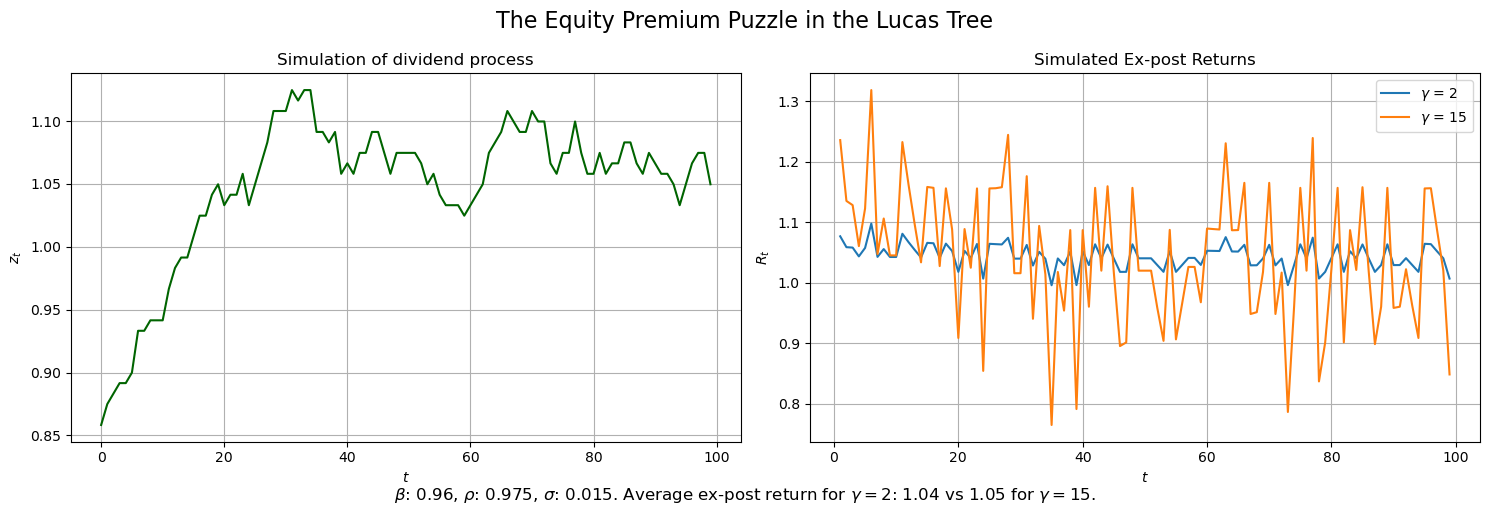

In [13]:
# An example with gamma = 2, calibrated to consumption
lucas_ex3 = LucasAssetTree(plot_grid_size, 2, rho = 0.975, sigma=0.015)
lucas_ex3.solve()
lucas_ex3.simulate_Lucas(T=plot_simulation_length,seed = lucas_seed)
lucas_ex3.ex_post_returns()
lucas_ex3.ex_ante_returns()
av_3_post = np.nanmean(lucas_ex3.sim_ex_post_r)

# An example with gamma = 10, calibrated to consumption
lucas_ex4 = LucasAssetTree(plot_grid_size, 15, rho=0.975, sigma=0.015)
lucas_ex4.solve()
lucas_ex4.simulate_Lucas(T=plot_simulation_length, seed = lucas_seed)
lucas_ex4.ex_post_returns()
lucas_ex4.ex_ante_returns()
av_4_post = np.nanmean(lucas_ex4.sim_ex_post_r)

# initialise the figure of 2 plots
fig_3, axs_3 = plt.subplots(1, 2, figsize=(15, 5))
# plot dividend process
axs_3[0].set_title('Simulation of dividend process')
axs_3[0].plot(range(plot_simulation_length), lucas_ex3.sim_z, color='darkgreen')
axs_3[0].set_xlabel(r"$t$")
axs_3[0].set_ylabel(r"$z_t$")
axs_3[0].grid()
# plot ex post returns
axs_3[1].set_title('Simulated Ex-post Returns')
axs_3[1].plot(range(plot_simulation_length), lucas_ex3.sim_ex_post_r, label=fr'$\gamma$ = {lucas_ex3.gamma}')
axs_3[1].plot(range(plot_simulation_length), lucas_ex4.sim_ex_post_r, label=fr'$\gamma$ = {lucas_ex4.gamma}')
axs_3[1].set_xlabel(rf"$t$")
axs_3[1].set_ylabel(rf"$R_t$")
axs_3[1].legend()
axs_3[1].grid()
# overall title and footer
fig_3.suptitle("The Equity Premium Puzzle in the Lucas Tree", fontsize=16)
fig_3.text(0.5, 0, rf'$\beta$: {lucas_ex3.beta}, $\rho$: {lucas_ex3.rho}, $\sigma$: {lucas_ex3.sigma}. Average ex-post return for $\gamma=${lucas_ex3.gamma}: {av_3_post:.2f} vs {av_4_post:.2f} for $\gamma=${lucas_ex4.gamma}.', 
           ha='center', fontsize=12)

plt.tight_layout()
plt.show() 

In 1985, Mehra and Precott published the *The Equity Premium: A Puzzle*. It shows that in order to justify the exceess return of equities (the return on top of the risk free rate) agents would need to be implausably risk averse. We have not considered how to price bonds...yet. But the simple exercise above hints at Mehra and Prescott' point. Calibrated to consumption data, even a very high risk aversion, $\gamma=15$, produces only an 5% return. To get reasonable equity returns we would need absurd numbers...

However, perhaps this puzzle is unsurprising. The model *forces* consumption to behave like dividends (or vise-versa). This clearly creates a tension. A model of excess returns has to have agents who face a genuine portfolio choice, with the implications for consumption that follow. Secondly, the model is a complete markets model. The agents have access to an asset, shares, which spans the state space completely. A model with incomplete insurance might say something different. Others could come up with many more reasons. 

Despite this puzzle, we should step back and realise the methological importance of the step we have taken is. Firstly, we learned how to deal with contunous stochastic states using the Tauchen method. Secondly, we created a genuine equilibrium economy where asset prices emerge to ensure the market for shares clears. In this case, that means ensuring that agents have no incentive to trade.  

## Example 5: A Permenant Income Model